# Milestone - Random Forets

## Part 1 - Feedback responses (only if required)

## Part 2 - Milestone 3

### 1. Data importing

In [19]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

The first step consists on importing the csv fieles for train and test dataset, as they were already divided in the previous preprocessing steps.

In [3]:
# Import train and test datasets in csv format
data_train = pd.read_csv('OpenData/ames_train_clean.csv')
data_test = pd.read_csv('OpenData/ames_test_clean.csv')

As a second step, we will connvert the train and test datasets into NumPy arrays, extracting also the variables' names as an independent vector.

In [4]:
# Creating numpy arrays for X and Y
X_train = data_train.drop(columns = ['PID', 'SoldPrice']).values
X_test = data_test.drop(columns = ['PID', 'SoldPrice']).values
X_names = data_train.drop(columns = ['PID', 'SoldPrice']).columns.tolist()

Y_train = data_train['SoldPrice'].values.reshape(-1,1)
Y_test = data_test['SoldPrice'].values.reshape(-1,1)

In [6]:
print(X_names)

['BldgArea', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQual', 'CentralAir', 'X1FloorSF', 'X2FloorSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorchSF', '3SsnPorchSF', 'ScreenPorchSF', 'PoolArea', 'PoolQual', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubCl

### 2. Hyperparameter tuning
Recall what are the two most important hyperparameters. Propose a protocol that relies on the out-of-bag (OOB) error to tune this hyperparameter.

Based on our datase, we will apply a random forest model to predict the properties' sold price, as we did previously with the regression models. For this, as we have a regression problem, we will use the scikit function RandomForestRegressor()

The random forest model requires tuning two main parameters:

- **n_estimators:** number of trees in the forest
- **max_features:** number of features to take into account when looking for the best split

The tuning will be done in two steps: 

First we will tune the n_estimators parameter, with max_features=None.
Once we have found the n_estimators optimal parameter, we will tune max_features using gridsearchCV to find the value that gives the best performance. 
Finally we will check again the n_estimators parameter, with the newly defined max_features, to see if an adjustment is necessary.

#### 2.1. Tuning n_estimators
We will first tune the n_estimators paramater. For this step, max_features is to None, which will consider the total number of variables. 

We will calculate the OOB error for random forest models with different numbers of trees, from a minimum of 100 to a maximum of 1500 in steps of 50. Finally, the OOB error will be plotted for each n_estimators tested value for visually inspecting at which value the error stabilizes.

### CHECK IN THIS CODE WHY TO USE 1-OOB AND NOT OOB

c:\Users\cande\anaconda3\envs\scientific\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\cande\anaconda3\envs\scientific\lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\cande\anaconda3\envs\scientific\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\cande\anaconda3\envs\scientific\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

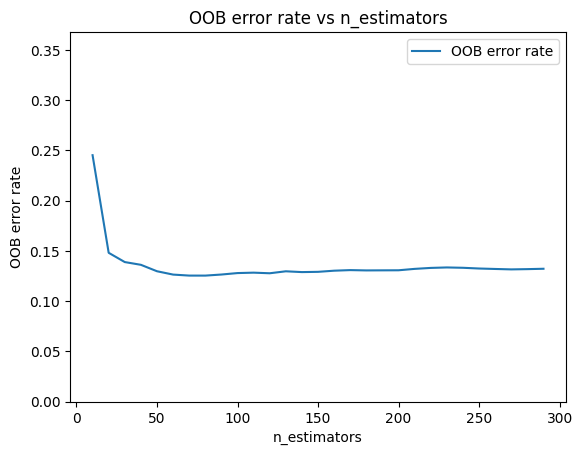

In [33]:
# Create an empty list for OBB error and i values iteration
error_rate = []
i_list = []

# Define a loop to iterate over the different values of n_estimators
for i in range(10, 300, 10):
    # warm_start = true: reuse the solution of the previous iteration, adding more estimators (otherwise a whole neww tree would be created)
    # random_state = 33: allows reproducibility, giving the same reuslts each time the notebook is ran
    # oob_score = true: sets oob score as the metric for generalisation score
    rf = RandomForestRegressor(warm_start=True, n_estimators=i, max_features=None, random_state=33, oob_score=True)
    rf.fit(X_train, Y_train)

    # Append OOB error rate and i values to the lists
    oob_error = 1 - rf.oob_score_
    error_rate.append(oob_error)
    i_list.append(i)
  

# Plot n_esitmators vs OOB error

plt.plot(i_list, error_rate, label="OOB error rate")
plt.ylim(0, 1.5*max(error_rate)) 
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.title("OOB error rate vs n_estimators")
plt.legend(loc="upper right")
plt.show()

Based on the obtained graphic, we can conclude that the OOB error gets stabilized when n_estimators reaches 50. Consequently, we will use this value for the model.

#### 2.2 Tuning max_features
Once we have tuned the n_estimators parameter, we will use the selected value for tuning the max_features parameter.

## WE HAVE TO MODIFY THIS CODE, AND COMMENT IT, IT WAS TAKEN FROM AUDREYS NOTEBOOK

In [34]:
# Create a dict of possible max_features values
cv_vals = {'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

# Define the model
# n_estimators=175 based on the previous parameter tuning step
rf = RandomForestRegressor(n_estimators=50, random_state=33)

# Define the number of sv iterations (B) 
B= 10
results_cv=pd.DataFrame()
for i in range(B):
    
    ##CHECK CV FOLDS NUMBER
    rf_cv = GridSearchCV(estimator=rf, param_grid=cv_vals, cv=5)
    rf_cv.fit(X_train, Y_train) # Fit the CV search
    if i==0: 
        results_cv=pd.DataFrame(rf_cv.cv_results_)[["params","mean_test_score","std_test_score"]]
    else:
        results_cv["mean_test_score"]=results_cv["mean_test_score"]+pd.DataFrame(rf_cv.cv_results_)["mean_test_score"]
        results_cv["std_test_score"]=results_cv["std_test_score"]+pd.DataFrame(rf_cv.cv_results_)["std_test_score"]  
        
        

results_cv["mean_test_score"]=results_cv["mean_test_score"]/B
results_cv["std_test_score"]=results_cv["std_test_score"]/B 

c:\Users\cande\anaconda3\envs\scientific\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\cande\anaconda3\envs\scientific\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\cande\anaconda3\envs\scientific\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\cande\anaconda3\envs\scientific\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

## WE HAVE TO MODIFY THIS CODE, AND COMMENT IT, IT WAS TAKEN FROM AUDREYS NOTEBOOK

In [35]:
# Step 3: get the best parameters (with the higher performance)
ind_best=results_cv["mean_test_score"].idxmax()
print(results_cv["params"].iloc[ind_best])
print(results_cv["mean_test_score"].iloc[ind_best])
print(results_cv["std_test_score"].iloc[ind_best])
print(results_cv)

{'max_features': 0.3}
0.8559804934744906
0.05349972873396193
                  params  mean_test_score  std_test_score
0  {'max_features': 0.1}         0.852317        0.042137
1  {'max_features': 0.2}         0.851562        0.049390
2  {'max_features': 0.3}         0.855980        0.053500
3  {'max_features': 0.4}         0.853489        0.045270
4  {'max_features': 0.5}         0.848758        0.050119
5  {'max_features': 0.6}         0.846198        0.056189
6  {'max_features': 0.7}         0.839342        0.059841
7  {'max_features': 0.8}         0.844082        0.053890
8  {'max_features': 0.9}         0.837312        0.059131


### 2. Measure the importance of variables
For the calibrated model, measure the importance of each variable. Justify the choice of the importance measure (why did you use this importance measure instead of another one?). Comment on the results: according to the importance measure you chose, what are the most discriminant variables of your dataset?
Interpret.

### 3. Variable selection
Based on the feature importance analysis (previous question), conduct a selection of variables using one
of the strategies described during the lecture. Justify your choice and recall how the selected technique
works. Implement and run it. What is the final number of selected variables in the model? Justify if you
need to recalibrate the forest or not.

### 4. Evaluate test performance
Evaluate the test performance of the two random forest models (based on the full set of variables or a subset) and determine the configuration of the best model (based on the main evaluation metric you selected in step 1).